In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [ ]:
data_path_1 = "/content/fy25-adopted-operating-budget.csv"
data_path_2 = "/content/fy25-fy29-capital-budget-plan-adopted.csv"

data1 = pd.read_csv(data_path_1)
data2 = pd.read_csv(data_path_2, encoding='latin1')

In [ ]:
data1.head()

,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.9,383743.11,219633.42,234628
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.3,25350.83,16734.29,20000
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115,53000


In [ ]:
data2.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,Improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,2000000,0,0,0,...,0,0,0,2000000,0,0,0,0,0,2000000
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,Repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,84629,139188,400000,1176183,0,0,0,0,0,1800000
2,Boston Centers for Youth and Families,BCYF North End Community Center,Design and construct a new North End Community...,Public Facilities Department,In Design,North End,68000000,0,0,0,...,9500,1000000,2000000,64990500,0,0,0,0,20000000,88000000
3,Boston Centers for Youth and Families,Pool Repairs,Renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,2300000,2700000,0,0,...,886590,500000,1000000,2613410,0,0,0,0,0,5000000
4,Boston Centers for Youth and Families,Youth Budget Round 4,Engage youth across the City using participato...,Youth Engagement and Advancement,Implementation Underway,Citywide,1000000,0,0,0,...,28500,13815,0,957685,0,0,0,0,0,1000000


In [ ]:
col = "Project_Name"
print(list(data2[col]))

['BCYF Security and Technology Upgrades', 'BCYF Tobin Community Center Retaining Wall', 'BCYF North End Community Center', 'Pool Repairs', 'Youth Budget Round 4', 'Youth Budget Round 5', 'Youth Budget Round 6', 'Youth Budget Round 7', 'Youth Budget Round 8', 'BCYF Hyde Park Community Center', 'BCYF Roslindale Community Center', 'Youth Budget Round 9', 'BCYF Allston Community Center', 'Youth Budget Round 10', 'BCYF Tobin Community Center Improvements', 'BCYF Dorchester Community Center', 'BCYF Clougherty Pool', 'BCYF Johnson Community Center Renovations', 'RLFMP Resiliency Improvements', 'Pier 10 Park Ferry Terminal', 'Little Mystic Open Space / Harborwalk', 'Long Wharf Resiliency Improvements', 'RLFMP Wharf 8/Pier 10 Improvements', 'RLFMP South Jetty and Bulkhead Rehabilitation', 'RLFMP Fid Kennedy Realignment', 'RLFMP Streetscape Improvements', 'EMS Radio System Upgrades', 'EMS Seaport Station', 'Long Island Facility Preservation', 'Long Island Recovery Campus', 'IT Disaster Recovery/

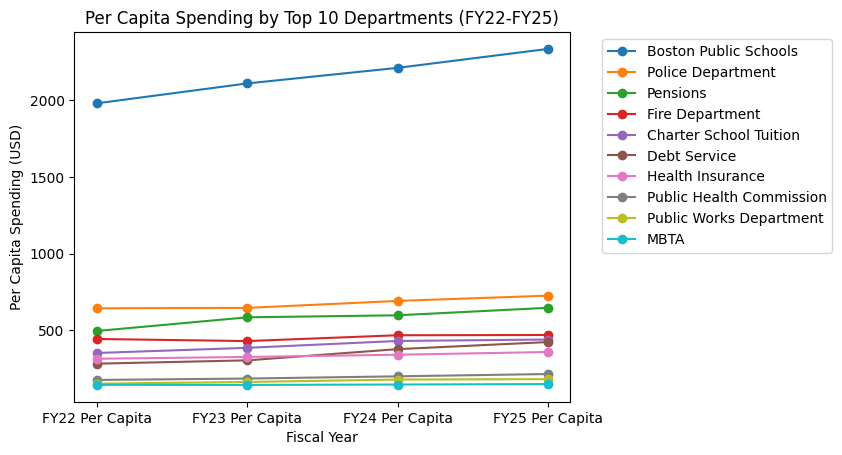

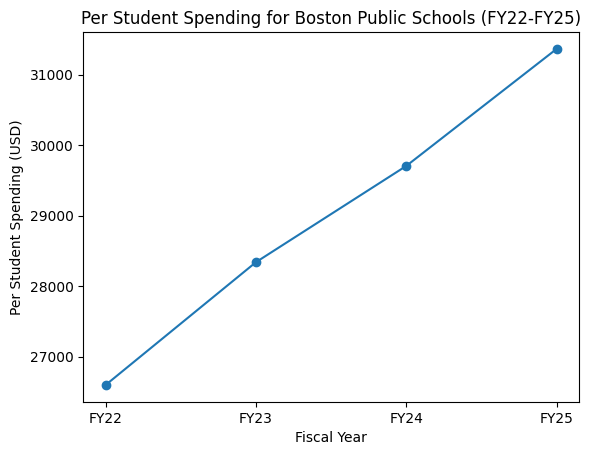

In [ ]:
operating_budget_df = data1.copy()
capital_budget_df = data2.copy()

total_population = 653833  # Total population for general per capita
school_population = 48674  # School-aged children population for educational spending


for col in ['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']:
    operating_budget_df[col] = pd.to_numeric(operating_budget_df[col].str.replace(',', '').fillna(0), errors='coerce')

# Step 2: Calculate Total Spending per Department
operating_budget_totals = operating_budget_df.groupby('Dept').sum(numeric_only=True)

# Step 3: Calculate Per Capita Spending
operating_budget_totals['FY22 Per Capita'] = operating_budget_totals['FY22 Actual Expense'] / total_population
operating_budget_totals['FY23 Per Capita'] = operating_budget_totals['FY23 Actual Expense'] / total_population
operating_budget_totals['FY24 Per Capita'] = operating_budget_totals['FY24 Appropriation'] / total_population
operating_budget_totals['FY25 Per Capita'] = operating_budget_totals['FY25 Budget'] / total_population

top_departments = operating_budget_totals['FY25 Per Capita'].nlargest(10).index
subset_budget_totals = operating_budget_totals.loc[top_departments]

years = ['FY22 Per Capita', 'FY23 Per Capita', 'FY24 Per Capita', 'FY25 Per Capita']
for dept in subset_budget_totals.index:
    plt.plot(years, subset_budget_totals.loc[dept, years], marker='o', label=dept)

plt.title("Per Capita Spending by Top 10 Departments (FY22-FY25)")
plt.xlabel("Fiscal Year")
plt.ylabel("Per Capita Spending (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

bps_totals = operating_budget_df[operating_budget_df['Dept'] == 'Boston Public Schools'].sum()
bps_per_student = {
    'FY22': bps_totals['FY22 Actual Expense'] / school_population,
    'FY23': bps_totals['FY23 Actual Expense'] / school_population,
    'FY24': bps_totals['FY24 Appropriation'] / school_population,
    'FY25': bps_totals['FY25 Budget'] / school_population
}

bps_years = list(bps_per_student.keys())
bps_values = list(bps_per_student.values())

plt.plot(bps_years, bps_values, marker='o')
plt.title("Per Student Spending for Boston Public Schools (FY22-FY25)")
plt.xlabel("Fiscal Year")
plt.ylabel("Per Student Spending (USD)")
plt.show()